TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

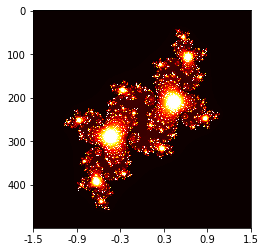

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Image width and height; parameters for the plot
im_width, im_height = 500, 500
c = complex(-0.1, 0.65)
zabs_max = 10
nit_max = 1000
xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin
ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

julia = np.zeros((im_width, im_height))
for ix in range(im_width):
    for iy in range(im_height):
        nit = 0
        # Map pixel position to a point in the complex plane
        z = complex(ix / im_width * xwidth + xmin,
                    iy / im_height * yheight + ymin)
        # Do the iterations
        while abs(z) <= zabs_max and nit < nit_max:
            z = z**2 + c
            nit += 1
        shade = 1-np.sqrt(nit / nit_max)
        ratio = nit / nit_max
        julia[ix,iy] = ratio

fig, ax = plt.subplots()
ax.imshow(julia, interpolation='nearest', cmap=cm.hot)
# Set the tick labels to the coordinates of z0 in the complex plane
xtick_labels = np.linspace(xmin, xmax, xwidth / 0.5)
ax.set_xticks([(x-xmin) / xwidth * im_width for x in xtick_labels])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])
ytick_labels = np.linspace(ymin, ymax, yheight / 0.5)
ax.set_yticks([(y-ymin) / yheight * im_height for y in ytick_labels])
ax.set_yticklabels(['{:.1f}'.format(ytick) for ytick in ytick_labels])
plt.show()